### International Trade Sector

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ex = pd.read_excel('../../Data/International_trade/currency.xlsx', index_col = 0) * 0.01
ex.index = pd.to_datetime(ex.index)
ex = ex.resample('M').last()
ex.index = pd.to_datetime(ex.index).strftime('%Y-%m')
ex.index = pd.to_datetime(ex.index)
ex

,dollar,bis_rate
index,,
2000-01-01,11.232,1.0536
2000-02-01,11.310,1.0557
2000-03-01,11.060,1.0682
2000-04-01,11.091,1.0861
2000-05-01,11.294,1.0689
...,...,...
2023-07-01,12.746,0.9870
2023-08-01,13.218,0.9660
2023-09-01,13.493,0.9619


In [22]:
ex_change = ex.pct_change()

In [109]:
trade = pd.read_excel('../../Data/International_trade/trade.xlsx', index_col = 0) * 0.01
trade.index = pd.date_range(start = '2000-01-01', end='2023-11-01', freq='M').strftime('%Y-%m')
trade.index = pd.to_datetime(trade.index)

In [110]:
trade

,export,import,exp_price_index,imp_price_idx,current_balance,capital_balance,finance_balance
2000-01-01,121624.25,125946.23,1.3365,0.7560,-2.181,-0.079,-7.343
2000-02-01,126760.42,120236.52,1.3063,0.7592,-3.241,0.009,6.830
2000-03-01,144297.03,142120.11,1.2960,0.7588,2.753,0.010,-4.027
2000-04-01,135220.40,133445.32,1.2907,0.7388,-11.560,0.006,-0.453
2000-05-01,146367.55,132833.56,1.2896,0.7546,15.355,0.000,7.898
...,...,...,...,...,...,...,...
2023-06-01,542441.99,530448.87,0.9830,1.2989,58.737,0.466,47.650
2023-07-01,505078.81,487100.85,0.9918,1.3021,37.370,-0.321,33.830
2023-08-01,520322.93,509871.29,1.0083,1.3568,49.846,-0.265,58.090
2023-09-01,546689.40,509721.09,1.0176,1.3971,54.207,0.237,45.241


<Axes: >

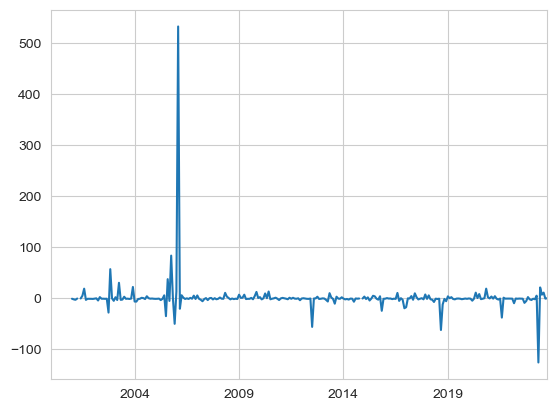

In [111]:
trade.capital_balance.pct_change(12).plot()

<Axes: >

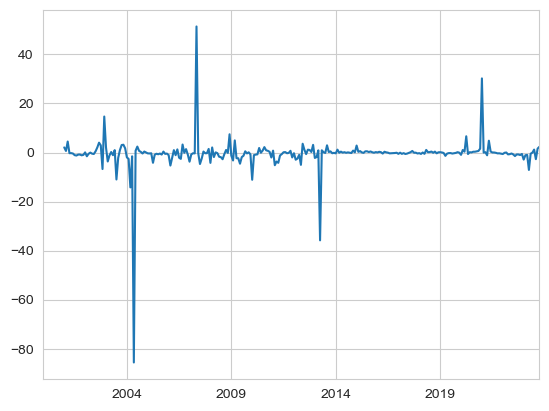

In [112]:
trade['current_balance'].pct_change(12).plot()

In [113]:
trade_test = trade.iloc[:,:-3].pct_change(12).dropna()
finance = trade['finance_balance'].pct_change(12)
capital = trade['capital_balance'].pct_change(12)
cb = trade['current_balance'].pct_change(12)

In [114]:
trade_test

,export,import,exp_price_index,imp_price_idx
2001-01-01,0.039672,-0.012990,-0.109914,0.083466
2001-02-01,0.053489,0.058934,-0.101967,0.069942
2001-03-01,-0.021124,-0.088666,-0.112191,0.077227
2001-04-01,-0.103603,-0.159791,-0.119470,0.132512
2001-05-01,-0.090853,-0.130127,-0.130661,0.093957
...,...,...,...,...
2023-06-01,-0.059566,-0.118122,-0.162906,-0.161297
2023-07-01,-0.161580,-0.253598,-0.113752,-0.136424
2023-08-01,-0.080798,-0.227792,-0.079094,-0.092199
2023-09-01,-0.043853,-0.164567,-0.045940,-0.095787


<Axes: >

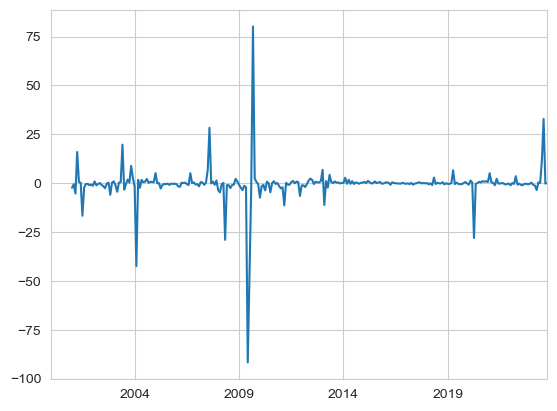

In [115]:
finance.plot()

In [116]:
inter_matrix = pd.concat([
    trade_test,
    ex_change,
    finance,
    capital,
    cb
], axis = 1).dropna()

In [117]:
inter_matrix

,export,import,exp_price_index,imp_price_idx,dollar,bis_rate,finance_balance,capital_balance,current_balance
2001-01-01,0.039672,-0.012990,-0.109914,0.083466,-0.004350,0.006446,-2.362114,-0.898734,2.085282
2001-02-01,0.053489,0.058934,-0.101967,0.069942,-0.006513,0.010979,-0.611859,-2.111111,0.643320
2001-03-01,-0.021124,-0.088666,-0.112191,0.077227,0.061321,-0.031976,-5.331016,-3.000000,4.482746
2001-04-01,-0.103603,-0.159791,-0.119470,0.132512,-0.005876,0.006752,15.958057,-0.500000,-0.267128
2001-05-01,-0.090853,-0.130127,-0.130661,0.093957,-0.028037,0.030644,0.553558,-inf,-0.245327
...,...,...,...,...,...,...,...,...,...
2023-06-01,-0.059566,-0.118122,-0.162906,-0.161297,-0.007158,0.013246,0.070762,21.190476,-0.031334
2023-07-01,-0.161580,-0.253598,-0.113752,-0.136424,-0.032709,0.024071,11.594937,7.025000,1.199270
2023-08-01,-0.080798,-0.227792,-0.079094,-0.092199,0.037031,-0.021277,32.891482,11.045455,-2.711686
2023-09-01,-0.043853,-0.164567,-0.045940,-0.095787,0.020805,-0.004244,-0.200407,-0.696543,1.594878


In [130]:
inter_matrix.loc[inter_matrix['capital_balance'] == -np.inf, 'capital_balance'] = 0

#### Primary Modeling

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = inter_matrix.drop(['current_balance'], axis = 1)
y = inter_matrix['current_balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, shuffle = False)

model = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'squared_error',
                              max_depth = 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.4710287024480975


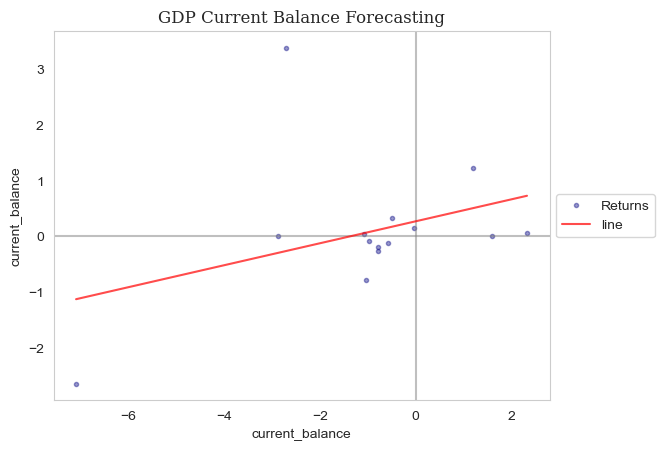

In [140]:
import seaborn as sns
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Current Balance Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Currnet Balance Forecasting')

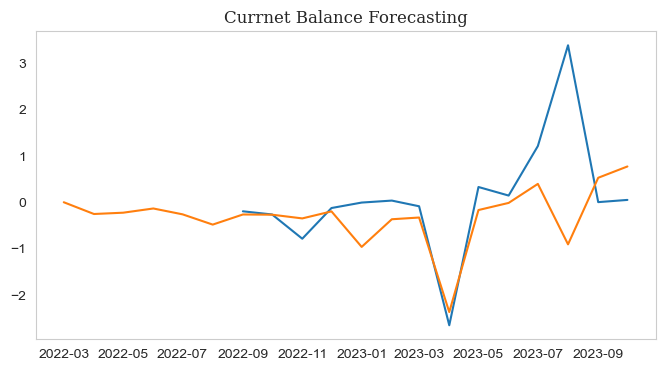

In [142]:
plt.figure(figsize = (8,4))
plt.plot(pd.Series(y_pred, index = X_test.index))
plt.plot(inter_matrix['current_balance'][-20:].dropna() / 3)
plt.grid(False)
plt.title('Currnet Balance Forecasting', fontsize = 12, fontfamily = 'Serif')

In [135]:
import shap

explainer_randomforest_reg = shap.TreeExplainer(model)

shap_values_train = explainer_randomforest_reg(X_train)
shap_values_test = explainer_randomforest_reg(X_test)
shap_values_all = explainer_randomforest_reg(X)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


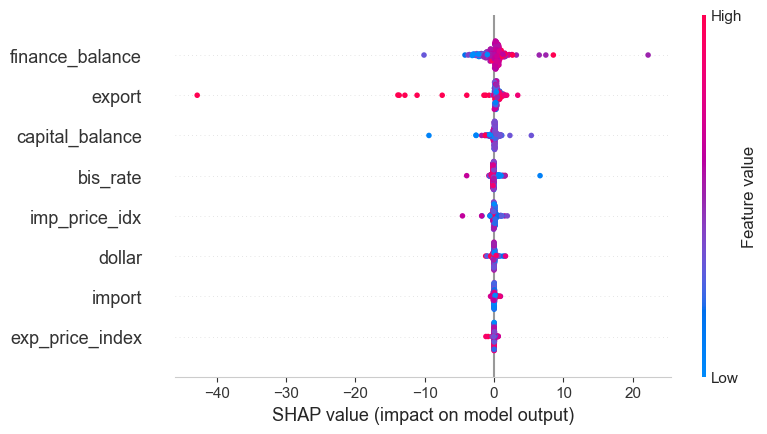

In [136]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


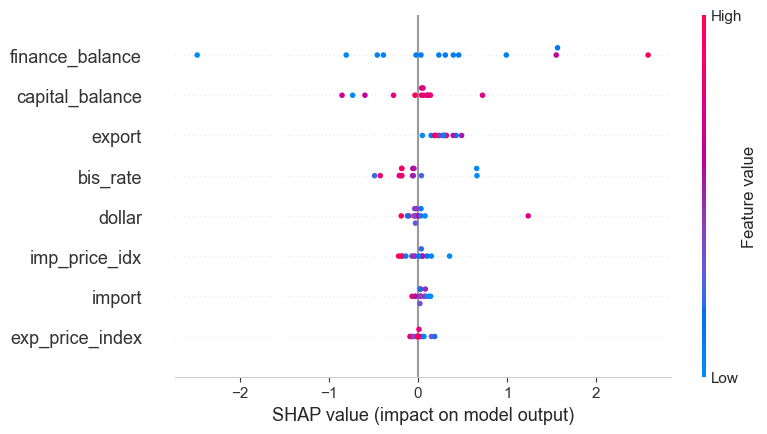

In [137]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

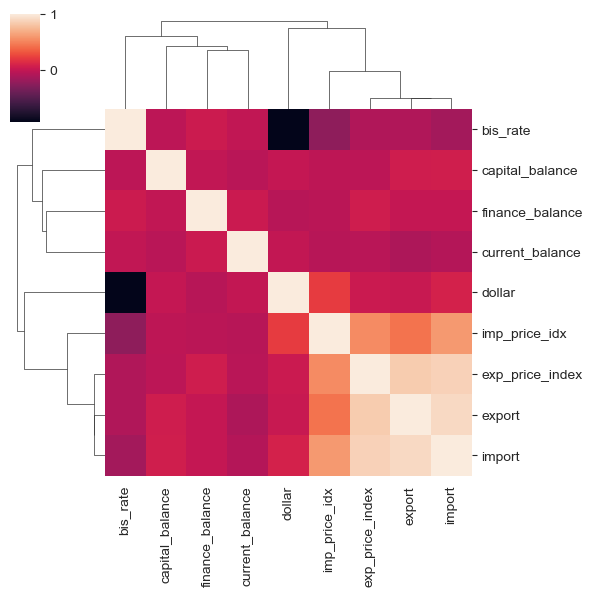

In [139]:
import seaborn as sns

sns.clustermap(inter_matrix.corr(), figsize = (6,6))

In [143]:
# inter_matrix.to_csv('../../Cleaned_Data/Current_balance.csv')